# 산술 연산

영상은 2차원 행렬이기 때문에 행렬의 산술 연산을 그대로 적용할 수 있다. 두 개의 이미지나 영상을 서로 더하거나 빼는 연산을 수행하여 새로운 결과 영상을 생성한다. 

In [1]:
import cv2
import numpy as np

a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [2]:
import cv2
import numpy as np

a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

mask = np.array([[1, 0]], dtype=np.uint8)

c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


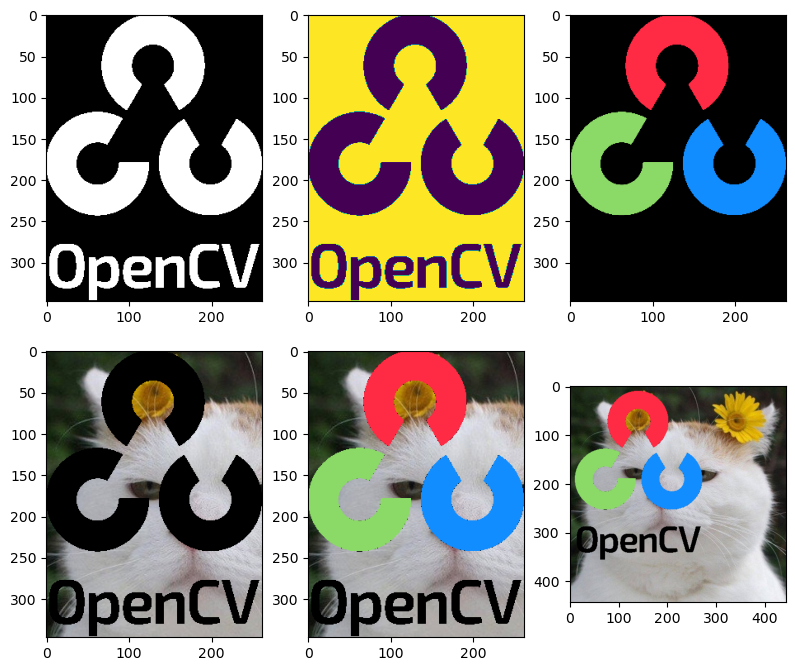

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_fg = cv2.imread('./img/opencv.png', cv2.IMREAD_UNCHANGED)
# img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGR2RGB)
img_fg = cv2.resize(img_fg, (int(2623*0.1), int(3472*0.1)))
img_bg = cv2.imread('./img/cat-01.jpg')
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

_, mask = cv2.threshold(img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2RGB)
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)


added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

plt.figure(figsize=(8,10))
plt.subplot(331)
plt.imshow(mask, cmap='gray')
plt.subplot(332)
plt.imshow(mask_inv)
plt.subplot(333)
plt.imshow(masked_fg)
plt.subplot(334)
plt.imshow(masked_bg)
plt.subplot(335)
plt.imshow(added)
plt.subplot(336)
plt.imshow(img_bg)
plt.tight_layout()
plt.show()

# cv2.imshow('mask', mask)

# cv2.imshow('masked_fg', masked_fg)
# cv2.imshow('masked_bg', masked_bg)
# cv2.imshow('added', added)
# cv2.imshow('result', img_bg)
# cv2.waitKey()
# cv2.destroyAllWindows() 

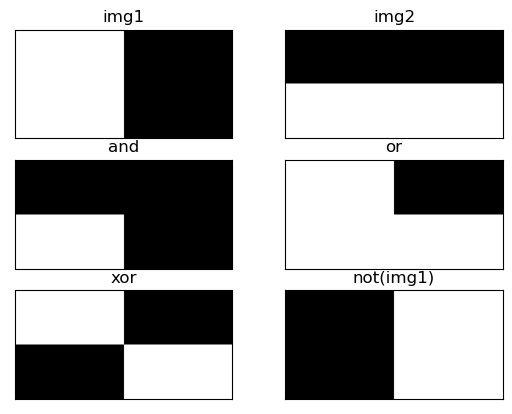

In [28]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image1 = np.zeros((200, 400), dtype=np.uint8)
image2 = np.zeros((200, 400), dtype=np.uint8)
image1[:, :200] = 255
image2[100:200, :] = 255

bit_and = cv2.bitwise_and(image1, image2)
bit_or = cv2.bitwise_or(image1, image2)
bit_xor = cv2.bitwise_xor(image1, image2)
bit_not = cv2.bitwise_not(image1)

#--③ Plot으로 결과 출력
imgs = {
    'img1': image1, 'img2': image2, 'and': bit_and, 
    'or': bit_or, 'xor': bit_xor, 'not(img1)': bit_not
}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

(305, 407, 3) (305, 407, 3)


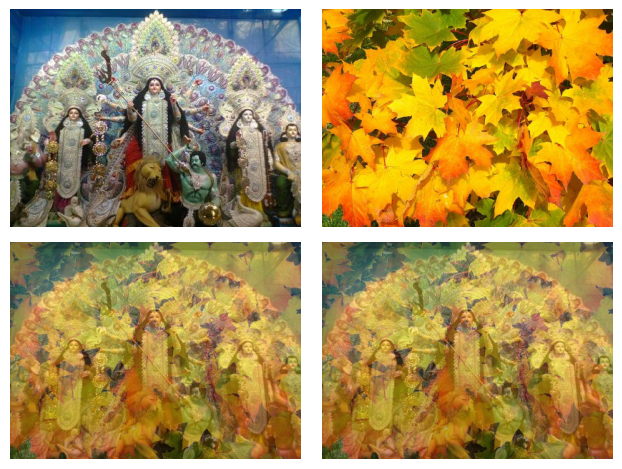

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.5

image1 = cv2.imread('./img/goddess.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('./img/leaves.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, (407, 305))
print(image1.shape, image2.shape)

blended = image1 * alpha + image2 * (1-alpha)
blended = blended.astype(np.uint8)

dst = cv2.addWeighted(image1, alpha, image2, (1-alpha), 0) 

plt.subplot(221)
plt.imshow(image1)
plt.axis('off')
plt.subplot(222)
plt.imshow(image2)
plt.axis('off')
plt.subplot(223)
plt.imshow(blended)
plt.axis('off')
plt.subplot(224)
plt.imshow(dst)
plt.axis('off')
plt.tight_layout()
plt.show()

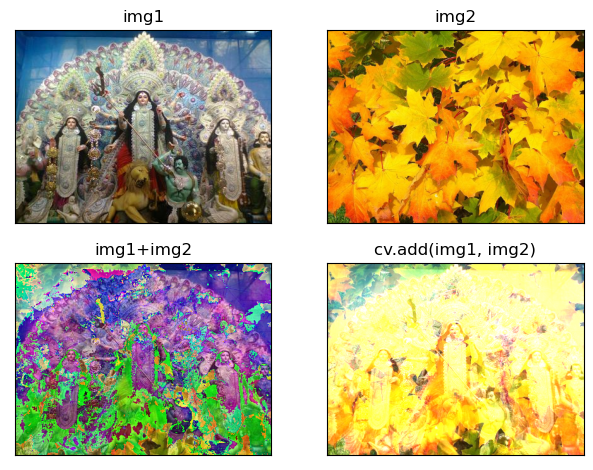

In [51]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image1 = cv2.imread('./img/goddess.png')
image2 = cv2.imread('./img/leaves.png')
image2 = cv2.resize(image2, (407, 305))

image3 = image1 + image2
image4 = cv2.add(image1, image2)

images = {
    'img1': image1, 
    'img2':image2, 
    'img1+img2': image3, 
    'cv.add(img1, img2)': image4
}

for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

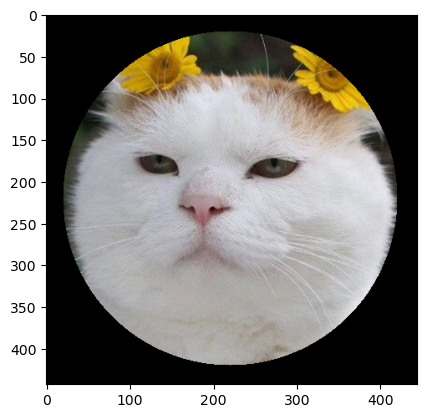

In [58]:
import numpy as np, cv2
import matplotlib.pylab as plt

img = cv2.imread('./img/cat-01.jpg')
mask = np.zeros_like(img)
cv2.circle(mask, (220, 220), 200, (255, 255, 255), -1)

masked = cv2.bitwise_and(img, mask)

plt.imshow(masked[...,::-1])
plt.show()

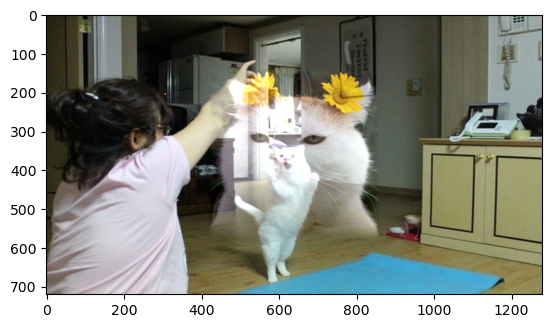

In [70]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
image1 = cv2.imread("./img/cat-01.jpg")
image2= cv2.imread("./img/cat-03.jpeg")
image2 = cv2.resize(image2, (1280, 720))

mask = np.full_like(image1, 255)

height, width = image2.shape[:2]
center = (width//2, height//2)

normal = cv2.seamlessClone(image1, image2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(image1, image2, mask, center, cv2.MIXED_CLONE)

plt.imshow(mixed[:,:,::-1])
plt.show()